# Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from data import build_features as bf
from data import process_data as pd
from learning_library import logistic_regression as lr

# One Feature: Tumor Radius

### Data Visualization

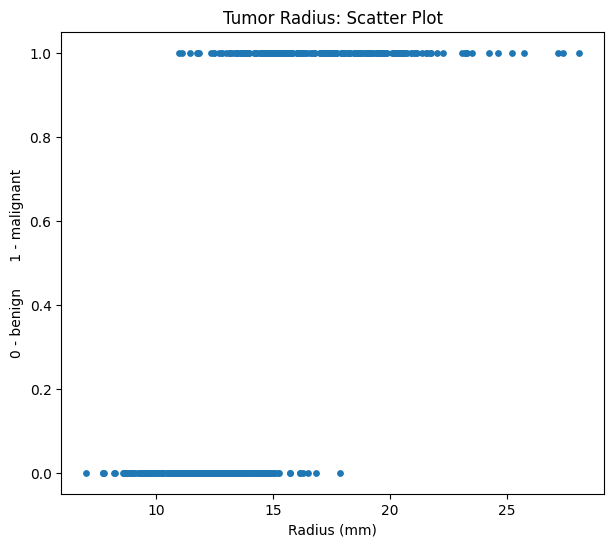

In [2]:
# Obtain X and y data as numpy arrays
X, y = pd.generate_data()

# Scatter plot of first feature - tumor radius
def one_feature_plot(title):
    plt.figure(figsize = (7, 6))
    plt.scatter(X[:, 0], y, s=15)
    plt.xlabel("Radius (mm)")
    plt.ylabel("0 - benign      1 - malignant")
    plt.title(title)
one_feature_plot("Tumor Radius: Scatter Plot")

Here we can observe that tumors with a larger radius are more likely to be malignant. However, there's many tumors within the 12-15mm region that are both benign and malignant. We can thus proceed with a logistic regression model based on just the tumor radius and see how it performs.

### Training

Iteration: 0  Cost: 0.6931471805599468
Iteration: 50  Cost: 0.31335375292983597
Iteration: 100  Cost: 0.300966261102916
Iteration: 150  Cost: 0.2981456977606313
Iteration: 200  Cost: 0.29727055072678393
Iteration: 250  Cost: 0.29696174264800057
Iteration: 300  Cost: 0.2968453099477227
Iteration: 350  Cost: 0.2967997298910725
Iteration: 400  Cost: 0.29678148224745493
Iteration: 450  Cost: 0.2967740756532758


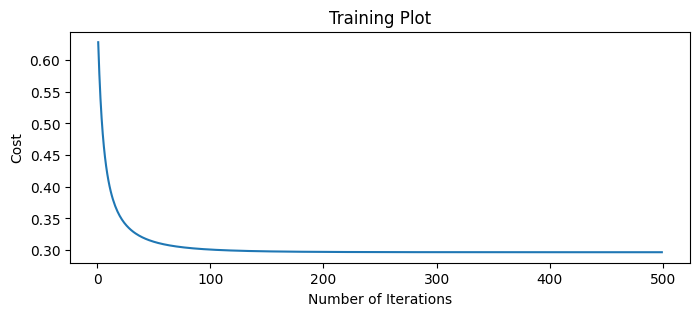

In [3]:
# To start, we obtain the default 90% train/test split of our data
X_train_1, X_test_1, y_train, y_test = bf.training_data(X, y, [0])
plt.figure(figsize = (8, 3))
w_vec_1, b_1 = lr.gradient_descent(500, X_train_1, y_train, 0.5, 0)

### Performance

In [4]:
# Evaluate logistic regression model accuracy
lr.predict(X_test_1, y_test, w_vec_1, b_1)

Parameters of model are: [3.55154128] and -0.6011170761860563
Model accuracy is 89.474%


### Decision Boundary Visualization

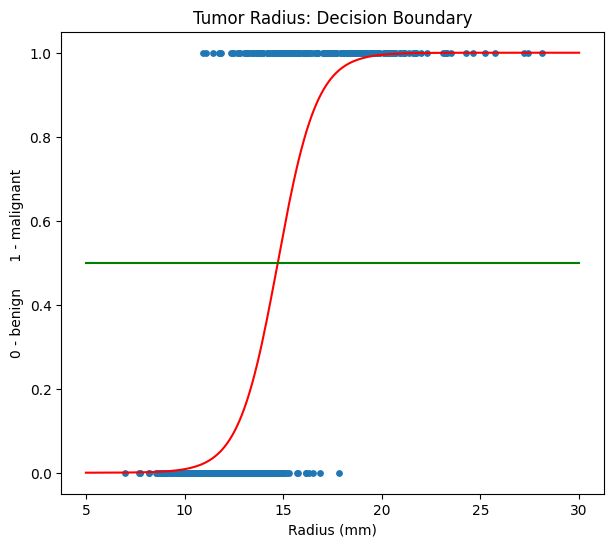

In [5]:
one_feature_plot("Tumor Radius: Decision Boundary")
mu_0, std_0 = np.mean(X[:, 0], axis=0), np.std(X[:, 0], axis=0)
in_radius = np.linspace(5, 30, 200)
in_radius_norm = bf.normalize(in_radius, mu_0, std_0)
out_1 = lr.sigmoid(w_vec_1*in_radius_norm + b_1)
bound_1 = np.ones(200)*0.5
plt.plot(in_radius, out_1, color="red")
plt.plot(in_radius, bound_1, color="green")
plt.show()

### Evaluation

# Two Features: Tumor Radius and Compactness

### Data Visualization

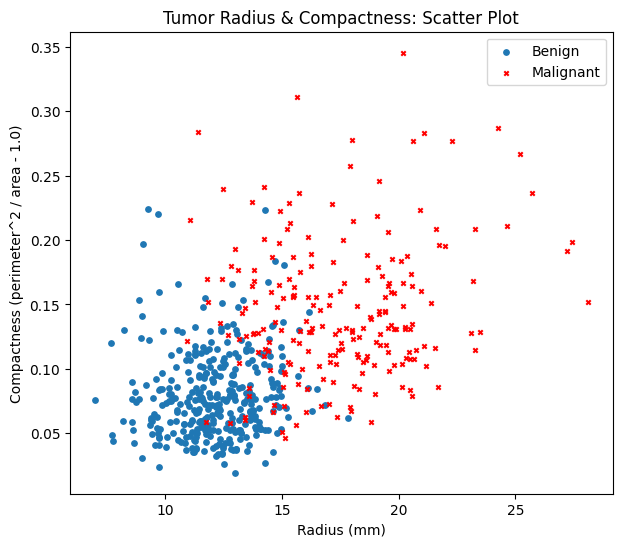

In [6]:
# Scatter plot of radius and texture
def malignant(i): return bool(i)
def benign(i): return not(bool(i))
mal, ben = np.vectorize(malignant)(y), np.vectorize(benign)(y)
X_mal_2, X_ben_2 = X[:, [0, 5]][mal], X[:, [0, 5]][ben]
def two_feature_plot(title):
    plt.figure(figsize = (7, 6))
    plt.scatter(X_ben_2[:, 0], X_ben_2[:, 1], marker="o", s=15, label="Benign")
    plt.scatter(X_mal_2[:, 0], X_mal_2[:, 1], marker="x", s=10, color="red", label="Malignant")
    plt.xlabel("Radius (mm)")
    plt.ylabel("Compactness (perimeter^2 / area - 1.0)")
    plt.legend()
    plt.title(title)
two_feature_plot("Tumor Radius & Compactness: Scatter Plot")
plt.show()

As we see in the scatterplot, there are many outliers, but we can see an overall trend that tumors with large radius and compactness are more likely to be malignant. Hence, these two features would be a decent candidate for logistic regression. From the plot, it seems that a straight line decision boundary would be sufficient, so we will begin by using a linear feature model, then also test whether the square feature model performs better.

### Training - Linear Feature Model

Iteration: 0  Cost: 0.6931471805599468
Iteration: 50  Cost: 0.24271465135486917
Iteration: 100  Cost: 0.22997132448474011
Iteration: 150  Cost: 0.22669923803651396
Iteration: 200  Cost: 0.2255447315166343
Iteration: 250  Cost: 0.22507849195125196
Iteration: 300  Cost: 0.22487606159646883
Iteration: 350  Cost: 0.22478428821118157
Iteration: 400  Cost: 0.2247415279108338
Iteration: 450  Cost: 0.22472124385098258


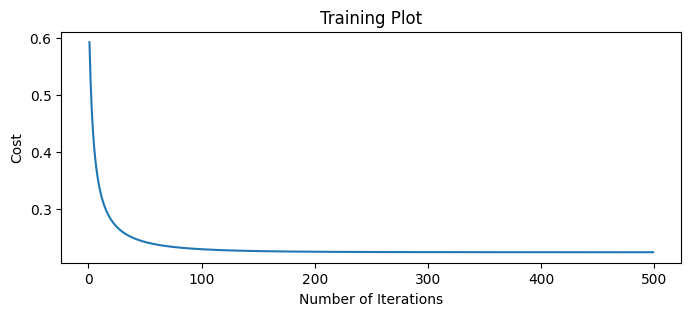

In [7]:
# Train a linear feature logistic regression model
X_train_2_lin, X_test_2_lin, y_train, y_test = bf.training_data(X, y, [0, 5])
plt.figure(figsize = (8, 3))
w_vec_2_lin, b_2_lin = lr.gradient_descent(500, X_train_2_lin, y_train, 0.5, 0)

### Performance - Linear Feature Model

In [8]:
# Evaluate linear feature logistic regression model accuracy
lr.predict(X_test_2_lin, y_test, w_vec_2_lin, b_2_lin)

Parameters of model are: [3.32739959 1.71169199] and -0.6978415427091174
Model accuracy is 91.228%


### Decision Boundary Visualization

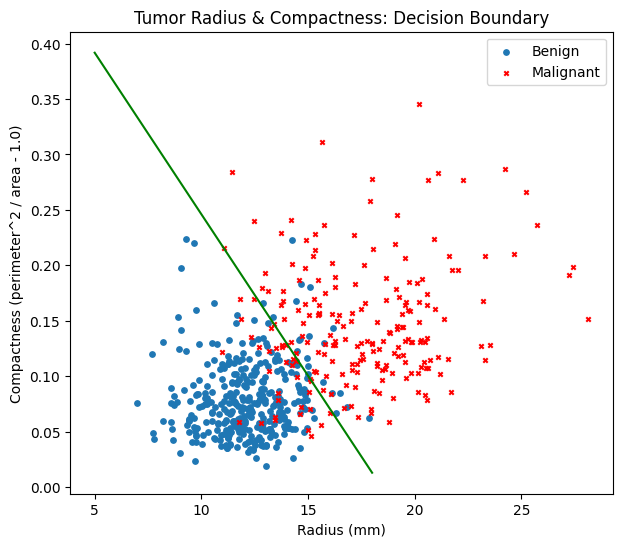

In [9]:
two_feature_plot("Tumor Radius & Compactness: Decision Boundary")
mu_5, std_5 = np.mean(X[:, 5], axis=0), np.std(X[:, 5], axis=0)
in_radius = np.linspace(5, 18, 200)
in_radius_norm = bf.normalize(in_radius, mu_0, std_0)
bound_2 = (-std_5/w_vec_2_lin[1])*(b_2_lin + w_vec_2_lin[0]*in_radius_norm) + mu_5
plt.plot(in_radius, bound_2, color="green")
plt.show()

### Talk about evaluation !!!!!!!!!!!!!

### Training - Square Feature Model

Iteration: 0  Cost: 0.6931471805599468
Iteration: 50  Cost: 0.23008296205156362
Iteration: 100  Cost: 0.22601300141234415
Iteration: 150  Cost: 0.22535674740798603
Iteration: 200  Cost: 0.22520950607488946
Iteration: 250  Cost: 0.22516550435721064
Iteration: 300  Cost: 0.22514502280798587
Iteration: 350  Cost: 0.22513026375602094
Iteration: 400  Cost: 0.22511701743116955
Iteration: 450  Cost: 0.22510425822899224


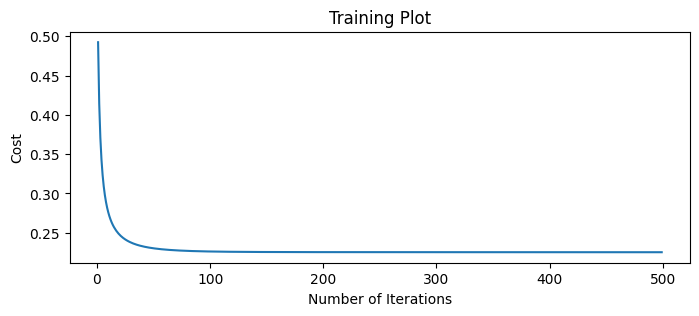

In [10]:
# Train a square feature logistic regression model
X_train_2_sq, X_test_2_sq, y_train, y_test = bf.training_data(X, y, [0, 5], model=2)
plt.figure(figsize = (8, 3))
w_vec_2_sq, b_2_sq = lr.gradient_descent(500, X_train_2_sq, y_train, 0.5, 0)

### Performance - Square Feature Model

In [11]:
# Evaluate square feature logistic regression model accuracy
lr.predict(X_test_2_sq, y_test, w_vec_2_sq, b_2_sq)

Parameters of model are: [1.66532953 0.71021944 1.5754558  0.86584615 0.50398855] and -0.42978421927505656
Model accuracy is 91.228%


### Talk about evaluation !!!!!!!!!!!!!

# Three Features: Radius, Texture, Compactness

### Data Visualization

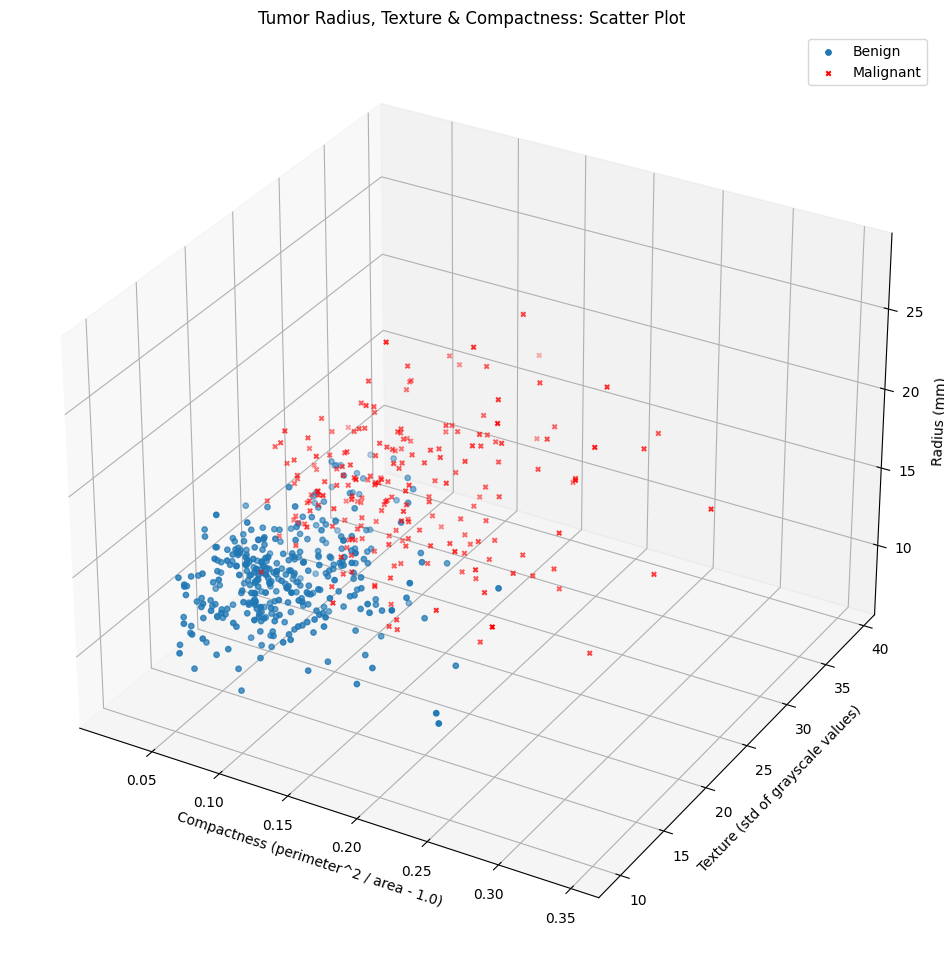

In [12]:
X_mal_3, X_ben_3 = X[:, [5, 1, 0]][mal], X[:, [5, 1, 0]][ben]
plt.figure(figsize = (12, 12))
ax = plt.axes(projection ="3d")
def three_feature_plot(title):
    ax.scatter3D(X_ben_3[:, 0], X_ben_3[:, 1], X_ben_3[:, 2], marker="o", s=15, label="Benign")
    ax.scatter3D(X_mal_3[:, 0], X_mal_3[:, 1], X_mal_3[:, 2], marker="x", s=10, color="red", label="Malignant")
    plt.xlabel("Compactness (perimeter^2 / area - 1.0)")
    plt.ylabel("Texture (std of grayscale values)")
    ax.set_zlabel("Radius (mm)")
    plt.title(title)
    plt.legend()
three_feature_plot("Tumor Radius, Texture & Compactness: Scatter Plot")
plt.show()

Adding in another feature ....

### Training

Iteration: 0  Cost: 0.6931471805599468
Iteration: 50  Cost: 0.2138562136509432
Iteration: 100  Cost: 0.19922864292688805
Iteration: 150  Cost: 0.19496508713231686
Iteration: 200  Cost: 0.1932539144835988
Iteration: 250  Cost: 0.19246379244409004
Iteration: 300  Cost: 0.1920694285521565
Iteration: 350  Cost: 0.19186283104455265
Iteration: 400  Cost: 0.191751062654721
Iteration: 450  Cost: 0.19168923463681464


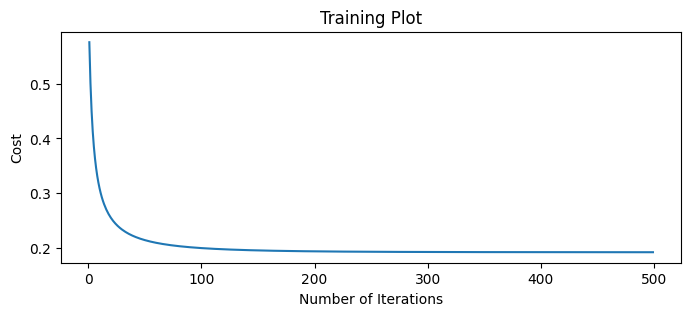

In [13]:
X_train_3, X_test_3, y_train, y_test = bf.training_data(X, y, [0, 1, 5])
plt.figure(figsize = (8, 3))
w_vec_3, b_3 = lr.gradient_descent(500, X_train_3, y_train, 0.5, 0)

### Performance

In [14]:
# Evaluate linear feature logistic regression model accuracy
lr.predict(X_test_3, y_test, w_vec_3, b_3)

Parameters of model are: [3.41116622 1.14024618 1.8688578 ] and -0.7607711228878437
Model accuracy is 92.982%


### Decision Boundary Visualization

In [15]:
# X, y = pd.generate_data()
# X_mal_3, X_ben_3 = X[:, [5, 1, 0]][mal], X[:, [5, 1, 0]][ben]
# plt.figure(figsize = (12, 12))
# ax = plt.axes(projection ="3d")
# ax.scatter3D(X_ben_3[:, 0], X_ben_3[:, 1], X_ben_3[:, 2], marker="o", s=15, label="Benign")
# ax.scatter3D(X_mal_3[:, 0], X_mal_3[:, 1], X_mal_3[:, 2], marker="x", s=10, color="red", label="Malignant")
# plt.xlabel("Compactness (perimeter^2 / area - 1.0)")
# plt.ylabel("Texture (std of grayscale values)")
# ax.set_zlabel("Radius (mm)")
# mu_0, std_0 = np.mean(X[:, 0], axis=0), np.std(X[:, 0], axis=0)
# mu_1, std_1 = np.mean(X[:, 1], axis=0), np.std(X[:, 1], axis=0)
# mu_5, std_5 = np.mean(X[:, 5], axis=0), np.std(X[:, 5], axis=0)
# in_compact = np.linspace(0.05, 0.20, 200)
# in_texture = np.linspace(0, 40, 200)
# Compact, Texture = np.meshgrid(in_compact, in_texture)
# Radius = (-std_0/w_vec_3[0])*(b_3 + w_vec_3[1]*((Texture-mu_1)/std_1) + w_vec_3[2]*((Compact-mu_5)/std_5)) + mu_0
# ax.plot_surface(Compact, Texture, Radius)
# plt.show()